# Review

Hello!

My name is Yaroslav. I'm going to review your project and try to help you make it even better! Let's get started!

You can find my comments in <span style="color:green">green</span>, <span style="color:yellow">yellow</span> and <span style="color:red">red</span> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done successfully.
</div>

<div class="alert alert-block alert-warning">
<b>Improve:</b> if i can give some recommendations to improve your project.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Project can't be accepted with the red comments.
</div>

Please don't delete my comments. If you have any questions, please write them and I will be happy to help you! For example, you can use <span style="color:blue">blue</span> boxes like this: 

<div class="alert alert-block alert-info">
Student's comment.
</div>

### <span style="color:orange">General feedback</span>

- I really like your project.
- Thank you for your methodical and logical approach to filling in missing values.
- I also want to praise you for a large number of comments in the code and text blocks.
- But please pay attention to visualization. It is important to give titles for plots. 
- It would be nice if you write a detailed General conclusion. The skill of writing conclusions is extremely important for an analyst.
- I've left an "improve" comments, which could help you to polish your project and further develop your skills. It doesn't mean that you've done something wrong, it just contains some advice on how it could be improved.

### <span style="color:orange">General feedback (v2)</span>

- The project is perfectly finalized, all comments red and yellow were corrected, well done!

The project is accepted, good luck in further education!

# Research on car sales ads

The database will be checked for erroneous data and null values. The data collected over the past few years will be examined and determined what factors influence the price of a car. will examine how many days the ad was shown. Will be analyzed the number of ads and the average price for a popular type of car. What factors influence the price the most.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 
    
The introduction to the project is very important in the analytical report. With it, people who will watch it can fully understand what is it about. I also recommend describing the data attributes, work plan, and clearly state the purpose of the study. Follow the [link](https://sebastianraschka.com/Articles/2014_ipython_internal_links.html) to see how to make a clickable table of contents - this is very convenient, but not necessary.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
I tried to describe future actions with data
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

👍

</div>

### Step 1. Open the data file and study the general information. 

In [5]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/vehicles_us.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [6]:
data.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

### Conclusion

at first look i saw that in price minimum is 1$. Minimum model year is 1908, need will be see what is car. Odometer has minimum 0. 4wd have only 1.
And data have NaN values.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> 

A good first look at the data!

</div>

### Step 2. Data preprocessing

In [7]:
data[data['price'] == 1]

price  model_year                  model  condition  cylinders    fuel  \
405        1      2014.0       chevrolet camaro  excellent        6.0     gas   
3063       1      1998.0    chevrolet silverado       good        8.0     gas   
3808       1      2007.0        chevrolet tahoe       good        8.0     gas   
3902       1      1996.0             ford f-150       fair        NaN     gas   
4140       1      2004.0    chevrolet silverado  excellent        8.0  diesel   
...      ...         ...                    ...        ...        ...     ...   
49699      1      2007.0  chevrolet trailblazer  excellent        8.0     gas   
49709      1         NaN              ford f150  excellent        8.0     gas   
50245      1      1986.0    chevrolet silverado       good        8.0     gas   
50393      1      2003.0      gmc sierra 2500hd       good        8.0  diesel   
51256      1      2012.0         honda civic lx  excellent        4.0     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
405     71310.0    automatic   coupe         NaN     NaN  2018-07-14   
3063   164000.0    automatic  pickup         NaN     1.0  2018-10-11   
3808      200.0    automatic     SUV         red     NaN  2019-03-18   
3902   163000.0       manual   truck       white     NaN  2019-02-23   
4140    83000.0    automatic  pickup         NaN     1.0  2019-02-04   
...         ...          ...     ...         ...     ...         ...   
49699       NaN    automatic     SUV       black     1.0  2018-08-06   
49709  139700.0        other  pickup         red     1.0  2019-03-11   
50245       NaN    automatic   truck         red     1.0  2018-11-30   
50393  212300.0    automatic  pickup       black     1.0  2019-04-12   
51256   71262.0    automatic   sedan        blue     NaN  2018-05-06   

       days_listed  
405             29  
3063            49  
3808            63  
3902            54  
4140            14  
...            ...  
49699           28  
49709           18  
50245           50  
50393           28  
51256           53  

[798 rows x 13 columns]

In [8]:
data.drop(index = data.index[data['price'] == 1], inplace=True)
data.reset_index(drop=True, inplace=True)

Price in 1$ have 1,5%. I drop it.

In [9]:
data[data['model_year'].isnull()]

price  model_year                       model  condition  cylinders  \
1      25500         NaN                  ford f-150       good        6.0   
20      6990         NaN             chevrolet tahoe  excellent        8.0   
65     12800         NaN                  ford f-150  excellent        6.0   
69      7800         NaN                  ford f-150   like new        8.0   
72      3650         NaN              subaru impreza  excellent        NaN   
...      ...         ...                         ...        ...        ...   
50666   8890         NaN        ford f250 super duty       good        8.0   
50667  34595         NaN                   gmc yukon  excellent        8.0   
50689   1495         NaN                  ford f-150       fair        6.0   
50690  21900         NaN  chevrolet silverado 3500hd  excellent        8.0   
50710   4950         NaN     chrysler town & country  excellent        6.0   

         fuel  odometer transmission      type paint_color  is_4wd  \
1         gas   88705.0    automatic    pickup       white     1.0   
20        gas  147485.0    automatic       SUV      silver     1.0   
65        gas  108500.0    automatic    pickup       white     NaN   
69        gas   97510.0    automatic     truck       white     1.0   
72        gas   74000.0    automatic     sedan        blue     1.0   
...       ...       ...          ...       ...         ...     ...   
50666     gas  135778.0    automatic     truck         red     1.0   
50667     gas   86456.0    automatic       SUV      silver     1.0   
50689     gas   15804.0       manual     truck       white     1.0   
50690  diesel  203000.0    automatic     truck       white     1.0   
50710     gas  150000.0    automatic  mini-van      silver     NaN   

      date_posted  days_listed  
1      2018-10-19           50  
20     2018-08-05           28  
65     2018-09-23           15  
69     2019-02-20           39  
72     2018-08-07           60  
...           ...          ...  
50666  2018-11-28           24  
50667  2019-04-18           13  
50689  2018-09-18           56  
50690  2018-12-27           37  
50710  2018-06-30           48  

[3567 rows x 13 columns]

In [10]:
model = data[data['model_year'].isnull()]['model'].unique() #get series of model witch have NaN in model year
for i in model:
    median = data[data['model'] == i]['model_year'].median() #get median for each model
    data['model_year'].loc[data['model'] == i] = data[data['model'] == i]['model_year'].fillna(value=median)
    #fill median for each model

In [11]:
data['model_year'].isnull().value_counts()

False    50727
Name: model_year, dtype: int64

In model_year data have 3567 rows. I changed NaN to an median by calculating it for each model.

In [12]:
data[data['model_year'] < 1949]

price  model_year              model  condition  cylinders fuel  \
22067  21000      1948.0   chevrolet impala   like new        8.0  gas   
33195  12995      1908.0          gmc yukon       good        8.0  gas   
33196  12995      1908.0  cadillac escalade  excellent        8.0  gas   
33999   5000      1936.0         ford f-150  excellent        6.0  gas   
44936  18000      1929.0         ford f-150       good        8.0  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
22067    4000.0    automatic   sedan         red     NaN  2019-01-18   
33195  169328.0    automatic     SUV       black     NaN  2018-07-06   
33196       NaN    automatic     SUV       white     NaN  2018-06-24   
33999   30000.0       manual  pickup      purple     NaN  2018-11-22   
44936       NaN       manual   other      silver     NaN  2018-11-18   

       days_listed  
22067           24  
33195           34  
33196           25  
33999           10  
44936           59

In [13]:
data.drop(index = data.index[data['model_year'] < 1949], inplace=True)
data.reset_index(inplace=True)

i delete this row because in this year this models didn't make. (quick check in wikipedia)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> 

Well done for learning more information from Wikipedia!

</div>

In [14]:
data[data['cylinders'].isnull()]

index  price  model_year              model  condition  cylinders fuel  \
9          9   9200      2008.0        honda pilot  excellent        NaN  gas   
36        36  10499      2013.0       chrysler 300       good        NaN  gas   
37        37   7500      2005.0      toyota tacoma       good        NaN  gas   
59        59   5200      2006.0  toyota highlander       good        NaN  gas   
63        63  30000      1966.0       ford mustang  excellent        NaN  gas   
...      ...    ...         ...                ...        ...        ...  ...   
50626  50631   3250      2004.0       toyota camry       good        NaN  gas   
50639  50644  28990      2018.0          ford f150  excellent        NaN  gas   
50657  50662   5995      2007.0        ford fusion  excellent        NaN  gas   
50674  50679   6499      2007.0           acura tl       good        NaN  gas   
50683  50688   5895      2009.0   hyundai santa fe  excellent        NaN  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
9      147191.0    automatic          SUV        blue     1.0  2019-02-15   
36      88042.0    automatic        sedan         NaN     NaN  2018-05-05   
37     160000.0    automatic       pickup         NaN     NaN  2018-07-22   
59     186000.0    automatic          SUV       green     NaN  2018-12-20   
63      51000.0       manual  convertible         red     NaN  2019-01-23   
...         ...          ...          ...         ...     ...         ...   
50626  179412.0    automatic        sedan         NaN     NaN  2018-07-02   
50639   10152.0    automatic        truck       white     1.0  2018-06-13   
50657   88977.0       manual        sedan      silver     NaN  2019-03-27   
50674  112119.0    automatic        sedan       white     NaN  2018-06-22   
50683       NaN    automatic        other        blue     NaN  2018-06-30   

       days_listed  
9               17  
36              22  
37              44  
59               2  
63              17  
...            ...  
50626           25  
50639           47  
50657           66  
50674           28  
50683           44  

[5189 rows x 14 columns]

In [15]:
model = data[data['cylinders'].isnull()]['model'].unique() #get series of model witch have NaN in cylinders
for i in model:
    median = data[data['model'] == i]['cylinders'].median() #get median for each model
    data['cylinders'].loc[data['model'] == i] = data[data['model'] == i]['cylinders'].fillna(value=median)
    #fill median for each model

In [16]:
data['cylinders'].isnull().value_counts()

False    50722
Name: cylinders, dtype: int64

In cylinders data have 5189 rows. I changed NaN to an median by calculating it for each model.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> 

Nice solution for filling in the gaps in columns 'model_year' and 'cylinders' using subgroups.

</div>

In [17]:
data['odometer'].isnull().value_counts()

False    42955
True      7767
Name: odometer, dtype: int64

In [18]:
data[data['odometer'].isin([0])]

index  price  model_year             model  condition  cylinders  \
352      352   7997      2009.0         gmc yukon  excellent        8.0   
813      813   2995      1999.0        ford f-150       good        6.0   
1374    1374   5888      2007.0    toyota 4runner       good        6.0   
1460    1460   1000      1992.0   gmc sierra 1500       good        8.0   
1969    1969  10988      2000.0     ford f-250 sd       good        8.0   
...      ...    ...         ...               ...        ...        ...   
48375  48380   3300      2002.0  hyundai santa fe       good        6.0   
48489  48494   3300      2002.0  hyundai santa fe       good        6.0   
49610  49615  25500      2008.0     jeep wrangler       good        6.0   
49829  49834   3600      2012.0      chrysler 200       good        4.0   
50387  50392   5000      2001.0      ford mustang  excellent        8.0   

         fuel  odometer transmission   type paint_color  is_4wd date_posted  \
352       gas       0.0    automatic    SUV       white     1.0  2019-03-16   
813       gas       0.0       manual  truck         NaN     NaN  2019-03-14   
1374      gas       0.0    automatic    SUV       black     NaN  2019-02-22   
1460      gas       0.0    automatic  truck         NaN     NaN  2018-09-28   
1969   diesel       0.0    automatic  truck       white     1.0  2018-11-21   
...       ...       ...          ...    ...         ...     ...         ...   
48375     gas       0.0    automatic  wagon       white     1.0  2019-04-14   
48489     gas       0.0    automatic  wagon       white     1.0  2019-02-15   
49610     gas       0.0    automatic    SUV      yellow     1.0  2018-06-12   
49829     gas       0.0    automatic  sedan         red     NaN  2018-07-24   
50387     gas       0.0       manual  coupe      silver     NaN  2019-01-20   

       days_listed  
352             88  
813             16  
1374            36  
1460            47  
1969            39  
...            ...  
48375           31  
48489            7  
49610           48  
49829           90  
50387           67  

[184 rows x 14 columns]

in odometer data have NaN and 0. I need make calculation to fill it. It will be in step 3.

In [19]:
data['paint_color'].isnull().value_counts()

False    41606
True      9116
Name: paint_color, dtype: int64

i don't have data to fill its row. leave so

In [20]:
data['is_4wd'].isnull().value_counts()

True     25816
False    24906
Name: is_4wd, dtype: int64

In [21]:
data['is_4wd'] = data['is_4wd'].fillna(value=False)
data['is_4wd'][data['is_4wd'] == 1] = True
data.head()

index  price  model_year           model  condition  cylinders fuel  \
0      0   9400      2011.0          bmw x5       good        6.0  gas   
1      1  25500      2011.0      ford f-150       good        6.0  gas   
2      2   5500      2013.0  hyundai sonata   like new        4.0  gas   
3      3   1500      2003.0      ford f-150       fair        8.0  gas   
4      4  14900      2017.0    chrysler 200  excellent        4.0  gas   

   odometer transmission    type paint_color is_4wd date_posted  days_listed  
0  145000.0    automatic     SUV         NaN   True  2018-06-23           19  
1   88705.0    automatic  pickup       white   True  2018-10-19           50  
2  110000.0    automatic   sedan         red  False  2019-02-07           79  
3       NaN    automatic  pickup         NaN  False  2019-03-22            9  
4   80903.0    automatic   sedan       black  False  2019-04-02           28

We have only 1 and NaN values. Changed 1 to True and NaN to False as logic like have or doesn't 4wd.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> 

I agree.

</div>

In [22]:
data[['model_year', 'cylinders']] = data[['model_year', 'cylinders',]].astype('int64')
data[['model_year', 'cylinders']] = data[['model_year', 'cylinders',]].astype('int64')
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.dtypes

index                    int64
price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                  object
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Change model_year and cylinders in int type. Also date posted to datetime format.

### step conclusion
Data have a lot of strange information, like year when cars didn't made. Price for cars by 1$. Was a lot data with None information. I changed data type for better.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

I really like your approach to filling missing values. It would be good to give a more detailed comment. You did a great job in this step, you can describe it.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
modified the conclusion</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

👍

</div>

### Step 3. Make calculations and add them to the table

In [23]:
import numpy as np
data['year'] = pd.DatetimeIndex(data['date_posted']).year #made new column with year of ads add
data['month'] = pd.DatetimeIndex(data['date_posted']).month #made new column with name of mounth of ads add
data['day'] = pd.DatetimeIndex(data['date_posted']).day_name() #made new column with name of day of ads add
data['vehicle_age'] = data['year'] - data['model_year'] #calculated vehicle age when ads add
data['average_mileage'] = round(data['odometer'] / data['vehicle_age']) # calculate average mileage per year for each car
data['average_mileage'].replace(np.inf, np.nan, inplace=True) # when the car is new, division by 0. Change inf to NaN


Make calculations with date and mileage.

In [24]:
data['average_mileage_for_model'] = data.groupby('model')['average_mileage'].transform(lambda grp: grp.median())
#made column with average mileage for each model
data['average_mileage'] = (data['average_mileage'].where( ((data['average_mileage'].notnull()) & (data['average_mileage'] != 0)), data['average_mileage_for_model']))
#fill NaN and 0 in average_mileage from average_mileage_for_model
data['odometer'] = (data['odometer'].where(((data['odometer'].notnull()) & (data['odometer'] != 0)), data['average_mileage']*data['vehicle_age'] ))
#calculated odometer by multiplying average_mileage to vehicle_age in rows with NaN or 0
data.drop(['average_mileage_for_model'], axis=1, inplace=True) # deleted the column because it is no longer needed
data.loc[data['odometer'].isnull()]['model'].unique()

array(['mercedes-benz benze sprinter 2500'], dtype=object)

In [25]:
data[data['model'] == 'mercedes-benz benze sprinter 2500']

index  price  model_year                              model  condition  \
42        42  34900        2013  mercedes-benz benze sprinter 2500  excellent   
1641    1641  34900        2013  mercedes-benz benze sprinter 2500  excellent   
2231    2231  34900        2013  mercedes-benz benze sprinter 2500  excellent   
2730    2730  34900        2013  mercedes-benz benze sprinter 2500  excellent   
4144    4144  34900        2013  mercedes-benz benze sprinter 2500  excellent   
4676    4676  34900        2013  mercedes-benz benze sprinter 2500  excellent   
5675    5675  34900        2013  mercedes-benz benze sprinter 2500  excellent   
8962    8962  34900        2013  mercedes-benz benze sprinter 2500  excellent   
10522  10522  34900        2013  mercedes-benz benze sprinter 2500  excellent   
11397  11397  34900        2013  mercedes-benz benze sprinter 2500  excellent   
11702  11702  34900        2013  mercedes-benz benze sprinter 2500  excellent   
14381  14381  34900        2013  mercedes-benz benze sprinter 2500  excellent   
14451  14451  34900        2013  mercedes-benz benze sprinter 2500  excellent   
16960  16960  34900        2013  mercedes-benz benze sprinter 2500  excellent   
16980  16980  34900        2013  mercedes-benz benze sprinter 2500  excellent   
17589  17589  34900        2013  mercedes-benz benze sprinter 2500  excellent   
18295  18295  34900        2013  mercedes-benz benze sprinter 2500  excellent   
19359  19359  34900        2013  mercedes-benz benze sprinter 2500  excellent   
21476  21476  34900        2013  mercedes-benz benze sprinter 2500  excellent   
22876  22877  34900        2013  mercedes-benz benze sprinter 2500  excellent   
25381  25382  34900        2013  mercedes-benz benze sprinter 2500  excellent   
26290  26291  34900        2013  mercedes-benz benze sprinter 2500  excellent   
26723  26724  34900        2013  mercedes-benz benze sprinter 2500  excellent   
31215  31216  34900        2013  mercedes-benz benze sprinter 2500  excellent   
33751  33754  34900        2013  mercedes-benz benze sprinter 2500  excellent   
33904  33907  34900        2013  mercedes-benz benze sprinter 2500  excellent   
34187  34191  34900        2013  mercedes-benz benze sprinter 2500  excellent   
35369  35373  34900        2013  mercedes-benz benze sprinter 2500  excellent   
35798  35802  34900        2013  mercedes-benz benze sprinter 2500  excellent   
37482  37486  34900        2013  mercedes-benz benze sprinter 2500  excellent   
39182  39186  34900        2013  mercedes-benz benze sprinter 2500  excellent   
39796  39800  34900        2013  mercedes-benz benze sprinter 2500  excellent   
41382  41386  34900        2013  mercedes-benz benze sprinter 2500  excellent   
41659  41663  34900        2013  mercedes-benz benze sprinter 2500  excellent   
41769  41773  34900        2013  mercedes-benz benze sprinter 2500  excellent   
43593  43597  34900        2013  mercedes-benz benze sprinter 2500  excellent   
43964  43968  34900        2013  mercedes-benz benze sprinter 2500  excellent   
47247  47252  34900        2013  mercedes-benz benze sprinter 2500  excellent   
47718  47723  34900        2013  mercedes-benz benze sprinter 2500  excellent   
49745  49750  34900        2013  mercedes-benz benze sprinter 2500  excellent   
49822  49827  34900        2013  mercedes-benz benze sprinter 2500  excellent   

       cylinders    fuel  odometer transmission type paint_color is_4wd  \
42             6  diesel       NaN    automatic  van       black  False   
1641           6  diesel       NaN    automatic  van       black  False   
2231           6  diesel       NaN    automatic  van       black  False   
2730           6  diesel       NaN    automatic  van       black  False   
4144           6  diesel       NaN    automatic  van       black  False   
4676           6  diesel       NaN    automatic  van         NaN  False   
5675           6  diesel       NaN    automatic  van       black  False   
8962

In [26]:
data.drop(index = data.index[data['model'] == 'mercedes-benz benze sprinter 2500'], inplace=True)
data.reset_index(inplace=True, drop=True)
data[['odometer', 'average_mileage']] = data[['odometer', 'average_mileage',]].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50681 entries, 0 to 50680
Data columns (total 19 columns):
index              50681 non-null int64
price              50681 non-null int64
model_year         50681 non-null int64
model              50681 non-null object
condition          50681 non-null object
cylinders          50681 non-null int64
fuel               50681 non-null object
odometer           50681 non-null int64
transmission       50681 non-null object
type               50681 non-null object
paint_color        41572 non-null object
is_4wd             50681 non-null object
date_posted        50681 non-null datetime64[ns]
days_listed        50681 non-null int64
year               50681 non-null int64
month              50681 non-null int64
day                50681 non-null object
vehicle_age        50681 non-null int64
average_mileage    50681 non-null int64
dtypes: datetime64[ns](1), int64(10), object(8)
memory usage: 7.3+ MB


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Everything is OK, but we have here two non-useful columns `level_0` and `index`. They are duplicates of the indexes. You can avoid these columns by using the `drop=True` parameter in the `reset_index()` function.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
added</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Thank you!

</div>

After calculeted odometer i find one model with NaN. It's looks like error or duplicate. 41 rows deleted with this model. 
Changed type to int for odometer and average_mileage.


In [27]:
data['condition'] = data['condition'].replace(to_replace=('new','like new','excellent','good','fair', 'salvage'), value=(5,4,3,2,1,0))
data.head(10)

index  price  model_year           model  condition  cylinders fuel  \
0      0   9400        2011          bmw x5          2          6  gas   
1      1  25500        2011      ford f-150          2          6  gas   
2      2   5500        2013  hyundai sonata          4          4  gas   
3      3   1500        2003      ford f-150          1          8  gas   
4      4  14900        2017    chrysler 200          3          4  gas   
5      5  14990        2014    chrysler 300          3          6  gas   
6      6  12990        2015    toyota camry          3          4  gas   
7      7  15990        2013     honda pilot          3          6  gas   
8      8  11500        2012     kia sorento          3          4  gas   
9      9   9200        2008     honda pilot          3          6  gas   

   odometer transmission    type paint_color is_4wd date_posted  days_listed  \
0    145000    automatic     SUV         NaN   True  2018-06-23           19   
1     88705    automatic  pickup       white   True  2018-10-19           50   
2    110000    automatic   sedan         red  False  2019-02-07           79   
3    250976    automatic  pickup         NaN  False  2019-03-22            9   
4     80903    automatic   sedan       black  False  2019-04-02           28   
5     57954    automatic   sedan       black   True  2018-06-20           15   
6     79212    automatic   sedan       white  False  2018-12-27           73   
7    109473    automatic     SUV       black   True  2019-01-07           68   
8    104174    automatic     SUV         NaN   True  2018-07-16           19   
9    147191    automatic     SUV        blue   True  2019-02-15           17   

   year  month        day  vehicle_age  average_mileage  
0  2018      6   Saturday            7            20714  
1  2018     10     Friday            7            12672  
2  2019      2   Thursday            6            18333  
3  2019      3     Friday           16            15686  
4  2019      4    Tuesday            2            40452  
5  2018      6  Wednesday            4            14488  
6  2018     12   Thursday            3            26404  
7  2019      1     Monday            6            18246  
8  2018      7     Monday            6            17362  
9  2019      2     Friday           11            13381

Changed condition to numbers from 5 to 0.

### step conclusion
managed to restore the approximate mileage for many ads. Changed the machine condition data to a numerical parameter for the convenience of building histograms.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> 

Well done for this step! You did everything right!

</div>

### Step 4. Carry out exploratory data analysis

In [28]:
data['price'].describe()

count     50681.000000
mean      12304.878890
std        9986.340399
min           3.000000
25%        5295.000000
50%        9495.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

In [29]:
data['vehicle_age'].describe()

count    50681.000000
mean         8.600560
std          6.035687
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         69.000000
Name: vehicle_age, dtype: float64

In [30]:
data['cylinders'].describe()

count    50681.000000
mean         6.096032
std          1.637632
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [31]:
data['odometer'].describe()

count     50681.000000
mean     118606.420256
std       67915.232438
min           0.000000
25%       71840.000000
50%      114773.000000
75%      158000.000000
max      990000.000000
Name: odometer, dtype: float64

In [32]:
data['condition'].describe()

count    50681.000000
mean         2.631578
std          0.715523
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

described columns for make histogram

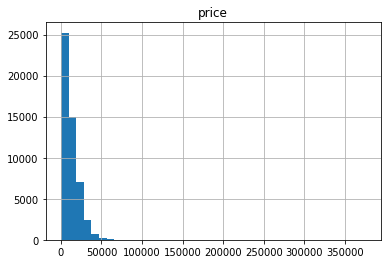

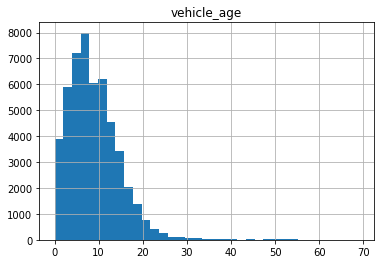

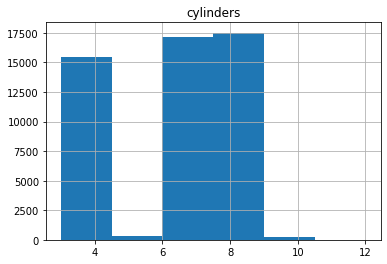

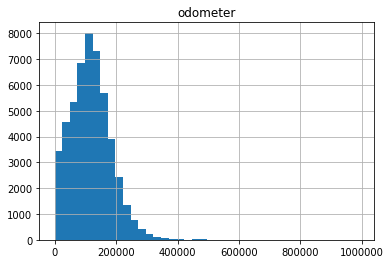

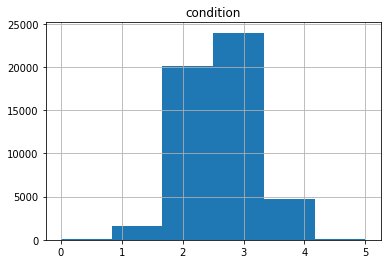

In [33]:
data.hist('price', bins=40);
data.hist('vehicle_age', bins=35);
data.hist('cylinders', bins=6);
data.hist('odometer', bins=40);
data.hist('condition', bins=6);

Determined the upper limits of outliers. Price below 100 above  45000$, vehicle_age upper 30 years. cylinders below 4 and above 10, odometer upper 360000 and condition below 0 above 5. This data small and not significant.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

I agree with limits. But what can you say about 3$ price? Also `discribe()` is not a good choice for a categorial feature like `condition`. It is usually used for quantitative features.

It would also be useful to look at the `odometer` column. For some autos, it is zero, although their condition is not new. This is strange a bit. What can we do with such ads?

</div>

In [34]:
data.loc[data['odometer'] == 0]['model_year'].value_counts()

2018    240
2019     47
Name: model_year, dtype: int64

In [35]:
data.loc[data['odometer'] == 0]['year'].value_counts()

2018    240
2019     47
Name: year, dtype: int64

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
3 it is like 1 of beginig. I can drop it at the beginning of the project, bit i dosn't take price less 100$ in query method.

What will be better for categorial feature?

Ads with mileage 0 are cars of the same model year as the ads. they are of different condition, but I cannot check this information. only years.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

I'm sorry, exactly, you're taking a slice with a minimum price of 100!

For 'condition' column it is better to use `value_counts()`, for example.

</div>

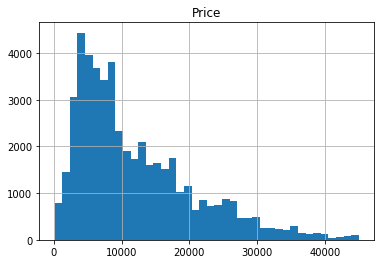

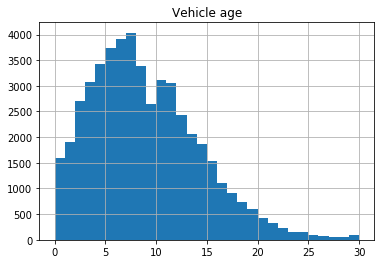

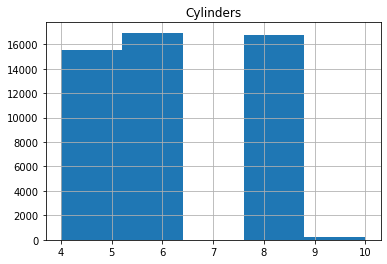

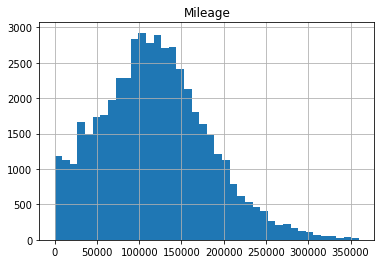

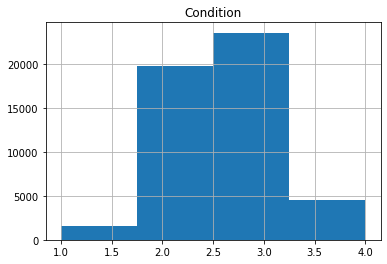

In [36]:
import matplotlib.pyplot as plt
filter_data = data.query("100 < price <= 45000 & vehicle_age <= 30 & 4 <= cylinders <= 10 & odometer <= 360000 & 0 < condition < 5")
filter_data.hist('price', bins=40);
plt.title('Price')
filter_data.hist('vehicle_age', bins=30);
plt.title('Vehicle age')
filter_data.hist('cylinders', bins = 5);
plt.title('Cylinders')
filter_data.hist('odometer', bins=40);
plt.title('Mileage')
filter_data.hist('condition', bins = 4);
plt.title('Condition');

In [37]:
px.histogram(filter_data, x="price", nbins=40)

In [38]:
px.histogram(filter_data, x='vehicle_age', nbins=35, labels={'x':'bla', 'y':'bbb'})

In [39]:
px.histogram(filter_data, x='cylinders', nbins=6)

In [40]:
px.histogram(filter_data, x='odometer', nbins=40)

In [41]:
px.histogram(filter_data, x='condition', nbins=6)

Made filtered df without the upper limits of outliers. Made new gistograms.  More cars with price about 4000$, 7 age, 6 and 8 cylinders with mileage about 120000, and excellent condition. 

In [42]:
filter_data['days_listed'].describe()

count    49485.000000
mean        39.561140
std         28.218938
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

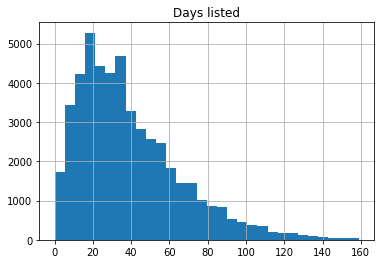

In [43]:
filter_data = filter_data.query("days_listed < 160")
filter_data.hist('days_listed', bins=30);
plt.title('Days listed');

days_listed above 160 small and not significant. Many cars sold about 19 days.

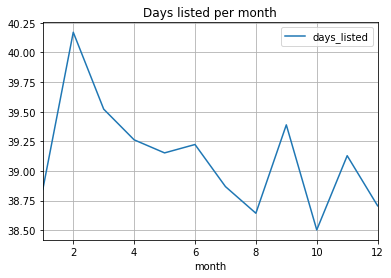

In [44]:
filter_data.pivot_table(index='month', values='days_listed').sort_values(by='month').plot(grid=True);
plt.title('Days listed per month');

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Please don't forget to give title to your plots 😉

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>

When we use df.hist to add titel need import matplotlib.pyplot. In df.plot we have titel parameter. That mean will be better use plot for all graf?
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

`plt.title()` method is commonly used. I think it is convenient that the line for the graph is small, and all the additional parameters are in other lines.

</div>

in october cars sold more quickly than in february.

In [45]:
type_cars = filter_data[['type', 'price']]
type_cars.groupby('type').median().sort_values('price', ascending=False)

price
type              
truck        14995
pickup       14400
coupe        13900
offroad      11800
convertible  11250
bus          10500
other         8995
SUV           8990
van           7925
wagon         7900
mini-van      6495
hatchback     5995
sedan         5995

top 3 cars with hightes price is truck, pickup and coupe.

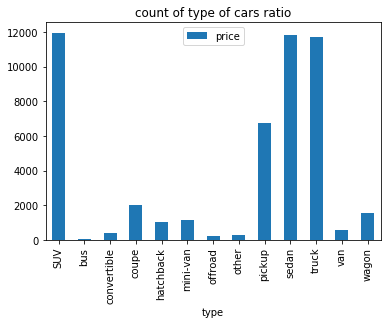

In [46]:
#type_cars.groupby('type').count().plot(kind='pie', subplots=True, figsize=(7,7), autopct='%.2f');
type_cars.groupby('type').count().plot(kind='bar', title='count of type of cars ratio');

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

A pie chart is very rarely a good choice for a chart. I would recommend barplot.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
chage for bar</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Much better, thank you!

</div>

top 3 ads counts for SUV, sedan and truck.

In [47]:
filter_data.loc[filter_data['type'] == 'SUV']['paint_color'].value_counts() #found colour with less 50 ads.

black     2109
white     1900
silver    1513
grey      1155
blue      1013
red        881
green      424
brown      363
custom     277
orange      84
yellow      48
purple      39
Name: paint_color, dtype: int64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Great, you found rare colors! But it would be also nice to print `value_count()` for the 'transmission' column to be sure that there are more than 50 values in each category.

</div>

In [39]:
filter_data.loc[filter_data['type'] == 'SUV']['transmission'].value_counts() #found transmission with less 50 ads.

automatic    11372
manual         491
other           93
Name: transmission, dtype: int64

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

👍

</div>

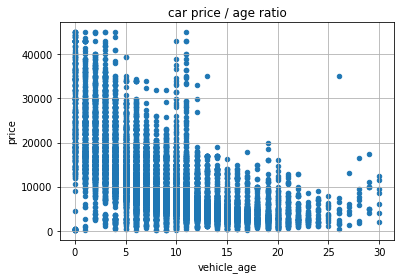

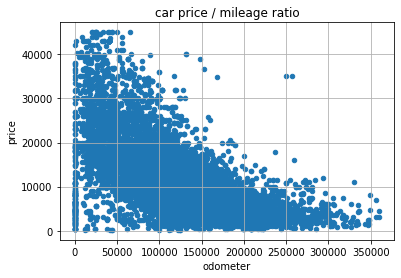

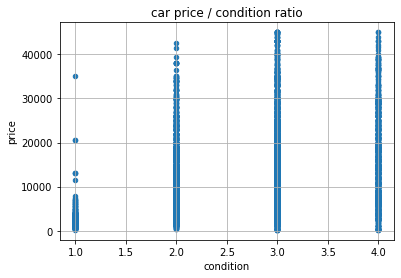

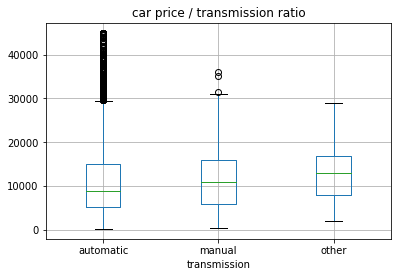

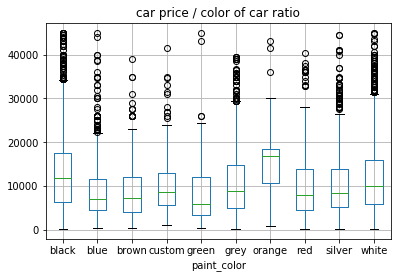

In [62]:
SUV_filter = filter_data.query('paint_color != "yellow" & paint_color != "purple" & type == "SUV"')
SUV_filter.plot(kind='scatter', y='price', x='vehicle_age', grid=True, title='car price / age ratio');
SUV_filter.plot(kind='scatter', y='price', x='odometer', grid=True, title='car price / mileage ratio');
SUV_filter.plot(kind='scatter', y='price', x='condition', grid=True, title='car price / condition ratio');
SUV_filter.boxplot(column ='price', by='transmission');
plt.title('car price / transmission ratio')      
plt.suptitle("")
SUV_filter.boxplot(column = 'price', by='paint_color');
plt.title('car price / color of car ratio')
plt.suptitle("");

In [70]:
px.box(SUV_filter, y='price', x='paint_color')

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> 

<s>Please, add titles to the plots.</s>

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Excellent!

</div>

For SUV type more high price for new cars. 10 year also have high price. I think people after 10 year want to sold cars and we have a lot of ads. we see a direct dependence of the price on the mileage. like with condition. price for manual transmission is more high than automatic. Orange and black cars more expencive.

In [41]:
filter_data.loc[filter_data['type'] == 'sedan']['paint_color'].value_counts()#found colour with less 50 ads.

silver    2022
black     1724
grey      1598
white     1452
blue      1201
red        905
custom     263
brown      257
green      205
purple      26
yellow      23
orange       9
Name: paint_color, dtype: int64

In [42]:
filter_data.loc[filter_data['type'] == 'sedan']['transmission'].value_counts() #found transmission with less 50 ads.

automatic    11153
manual         579
other           73
Name: transmission, dtype: int64

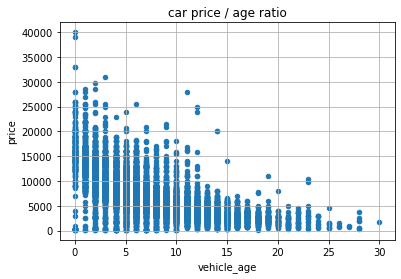

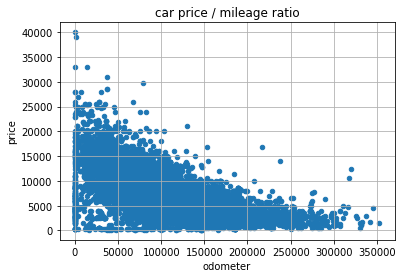

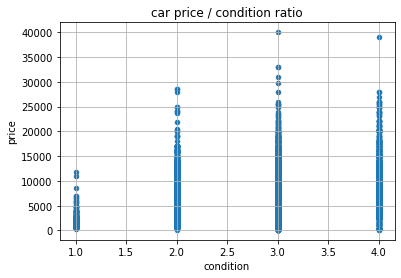

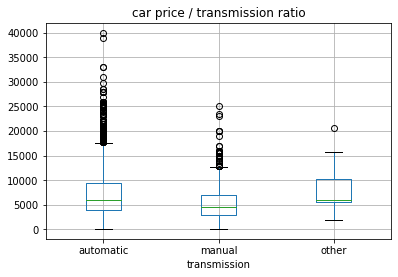

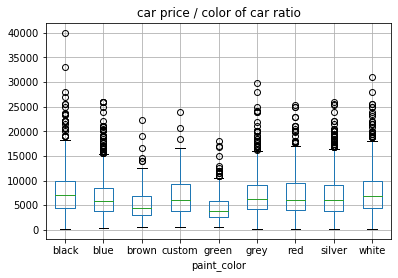

In [43]:
sedan_filter = filter_data.query('paint_color != "yellow" & paint_color != "purple" & paint_color != "orange" & type == "sedan"')
sedan_filter.plot(kind='scatter', y='price', x='vehicle_age', grid=True, title='car price / age ratio');
sedan_filter.plot(kind='scatter', y='price', x='odometer', grid=True, title='car price / mileage ratio');
sedan_filter.plot(kind='scatter', y='price', x='condition', grid=True, title='car price / condition ratio');
sedan_filter.boxplot(column ='price', by='transmission');
plt.title('car price / transmission ratio')      
plt.suptitle("")
sedan_filter.boxplot(column = 'price', by='paint_color');
plt.title('car price / color of car ratio')
plt.suptitle("");

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> 

<s>Again, titles, please :)</s>

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add %)</div>

the sedan has a more linear age-price ratio than the suv. Like a odometer-price ration. Exelent condiion have more higt price then like new car. I think it is because more ads with exelent condition. price for automatic transmission is more high than manual. Black and with cars more expencive.

### Step 5. Overall conclusion

Data have a lot of strange information. need to make important data such as mileage, make age required when filling out. The database contained ads with a price for the car below 100 dollars. I recognized this data as erroneous.
For many ads, the number of cylinders, year of car production, mileage were calculated.
age and mileage affect the price the most. the color and type of transmission affects depending on the type of vehicle. in the spring, cars sell better, worse in winter. A lot of cars with a price of about $ 4000, age 7, 6 and 8 cylinders with mileage of about 120,000, in excellent condition.
Highest average price for truck (14995) pickup (14400) and coupe (13900)
The most popular types of cars in ads are SUVs, sedans and trucks.
for SUV and sedan, study was conducted on the ratio of price and age (the younger the more expensive), price and mileage (the less the more expensive), condition (also linearly), transmission and body color.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Your overall conclusion is good. But still, it is better to be written so that manager can open the work, see the title, read the output and understand everything that was done and found in the project. You can include research abstracts, numbers, and so on. The General conclusion is the main part of the whole work and it is worth paying special attention to.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add more information to overall conclusion</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Thank you! I really like your overall conclusion now.

</div>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [X]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [X]  histograms for each parameter created
- [X]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn